In [18]:
#rock criterion function
import numpy as np
import warnings
warnings.filterwarnings('ignore')
threshold=0.5
__degree_normalization = 1.0 + 2.0 * ( (1.0 - threshold) / (1.0 + threshold) );

def rock_criterion(X,labels):
    n = labels.shape[0]
    criterion_score = np.sum(np.array([_intra_cluster_links(X, labels, i) for i in range(n)]))
    return criterion_score
def _intra_cluster_links(X, labels, i):
    indices = np.where(labels == labels[i])[0]
    if len(indices) == 0:
        return 0
    samples=X[indices].shape[0]
    links_count=(samples*(samples-1))/2
    devider=links_count**__degree_normalization
    if(devider!=0.0):
        score=links_count*(links_count/devider)
    else:
        score=0
    return score

In [10]:
#rock criterion function customize for continus distance
from sklearn.metrics.pairwise import distance_metrics
def rock_custom_criterion(X,labels, metric='euclidean'):
    metric = distance_metrics()[metric]
    n = labels.shape[0]
    A = np.array([_intra_cluster_distance(X, labels, metric, i)
                  for i in range(n)])
    B = np.array([_nearest_cluster_distance(X, labels, metric, i)
                  for i in range(n)])
    
    sil_samples = (B - A) / np.maximum(A, B)
    # nan values are for clusters of size 1, and should be 0
    return np.mean(np.nan_to_num(sil_samples))

def _intra_cluster_distance(X, labels,metric, i):
    indices = np.where(labels == labels[i])[0]
    if len(indices) == 0:
        return 0.
    a = np.mean([metric(X[i], X[j]) for j in indices if not i == j])
    return a

def _nearest_cluster_distance(X, labels, metric, i):
    label = labels[i]
    b = np.min(
            [np.mean(
                [metric(X[i], X[j]) for j in np.where(labels == cur_label)[0]]
            ) for cur_label in set(labels) if not cur_label == label])
    return b

In [5]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
data = load_iris()
dt_train=data.data

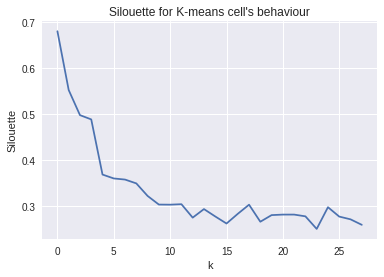

In [8]:
from sklearn.metrics import silhouette_score
from matplotlib.pylab import plt
%matplotlib inline
import seaborn as sns
s = []
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(dt_train)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    s.append(silhouette_score(dt_train, labels, metric='euclidean'))

plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

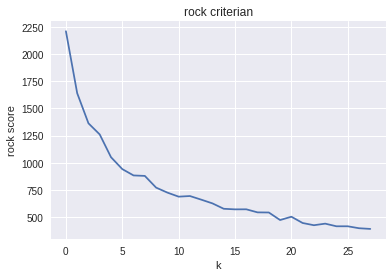

In [20]:
from sklearn.metrics import silhouette_score
from matplotlib.pylab import plt
%matplotlib inline
import seaborn as sns
s = []
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(dt_train)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    s.append(rock_criterion(dt_train, labels))

plt.plot(s)
plt.ylabel("rock score")
plt.xlabel("k")
plt.title("rock criterian")
sns.despine()